# Import Modules

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import seaborn as sns


# Load Dataset

In [2]:
df = pd.read_csv('customer_segmentation.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Feature Engineering

In [5]:
# Total Spending

df['Total_Spendings'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
 

In [6]:
# Convert Year_Birth to Age

current_year = 2025 

df['Age'] = current_year - df['Year_Birth']

In [7]:
# Total Childreen 

df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [8]:
# Total Purchases 

df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [9]:
# Total Campaigns Accepted 

df['Total_Campaigns_Accepted '] =  df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Spendings', 'Age', 'Total_Children', 'Total_Purchases',
       'Total_Campaigns_Accepted '],
      dtype='object')

In [11]:
columns_to_drop = [
    'ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Kidhome', 'Teenhome',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'Response', 'Year_Birth'
]

In [12]:
df_prep = df.drop(columns=columns_to_drop)

In [13]:
df_prep.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Spendings,Age,Total_Children,Total_Purchases,Total_Campaigns_Accepted
0,Graduation,Single,58138.0,58,7,0,1617,68,0,25,1
1,Graduation,Single,46344.0,38,5,0,27,71,2,6,0
2,Graduation,Together,71613.0,26,4,0,776,60,0,21,0
3,Graduation,Together,26646.0,26,6,0,53,41,1,8,0
4,PhD,Married,58293.0,94,5,0,422,44,1,19,0


In [14]:
df_prep.isnull().sum()

Education                     0
Marital_Status                0
Income                       24
Recency                       0
NumWebVisitsMonth             0
Complain                      0
Total_Spendings               0
Age                           0
Total_Children                0
Total_Purchases               0
Total_Campaigns_Accepted      0
dtype: int64

In [15]:
# Dropping Null Values
df_prep.dropna(inplace=True)

In [16]:
df_prep.isnull().sum()

Education                    0
Marital_Status               0
Income                       0
Recency                      0
NumWebVisitsMonth            0
Complain                     0
Total_Spendings              0
Age                          0
Total_Children               0
Total_Purchases              0
Total_Campaigns_Accepted     0
dtype: int64

# Define Features for Pipeline

In [17]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2216 non-null   object 
 1   Marital_Status             2216 non-null   object 
 2   Income                     2216 non-null   float64
 3   Recency                    2216 non-null   int64  
 4   NumWebVisitsMonth          2216 non-null   int64  
 5   Complain                   2216 non-null   int64  
 6   Total_Spendings            2216 non-null   int64  
 7   Age                        2216 non-null   int64  
 8   Total_Children             2216 non-null   int64  
 9   Total_Purchases            2216 non-null   int64  
 10  Total_Campaigns_Accepted   2216 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 207.8+ KB


In [18]:
numeric_features = df_prep.select_dtypes(include=['int64','float64']).columns.tolist()

categorical_features = df_prep.select_dtypes(include=['object']).columns.tolist()

In [19]:
numeric_features

['Income',
 'Recency',
 'NumWebVisitsMonth',
 'Complain',
 'Total_Spendings',
 'Age',
 'Total_Children',
 'Total_Purchases',
 'Total_Campaigns_Accepted ']

# Creating Pipelines

In [20]:
numeric_transformer = Pipeline(steps=[

    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))

])

preprocessor = ColumnTransformer(

    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# PCA + K-Means Pipeline

In [21]:
# Preprocess features

X_preprocessed = preprocessor.fit_transform(df_prep)

In [22]:
# PCA for dimensionality reduction 

pca = PCA(n_components=2, random_state=42)

X_pca = pca.fit_transform(X_preprocessed)

In [23]:
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)

Explained variance ratio by PCA components: [0.308797   0.11251595]


# Determine Optimal Clusters (Silhouette & Elbow Method)

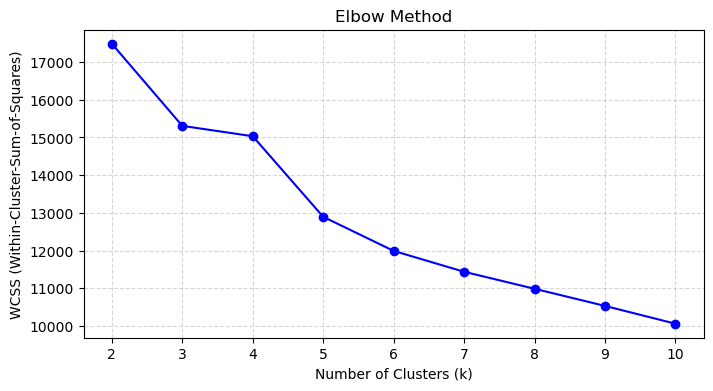

In [24]:
# Determine Optimal Clusters (Elbow Method)

wcss = []

K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit_predict(X_preprocessed)
    wcss.append(km.inertia_)

# Plotting the graph 

plt.figure(figsize=(8,4))
plt.plot(list(K), wcss, marker = 'o', color= 'blue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster-Sum-of-Squares)")
plt.title("Elbow Method")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Optimal number of clusters (Silhouette): 3
Best Silhouette Score: 0.248


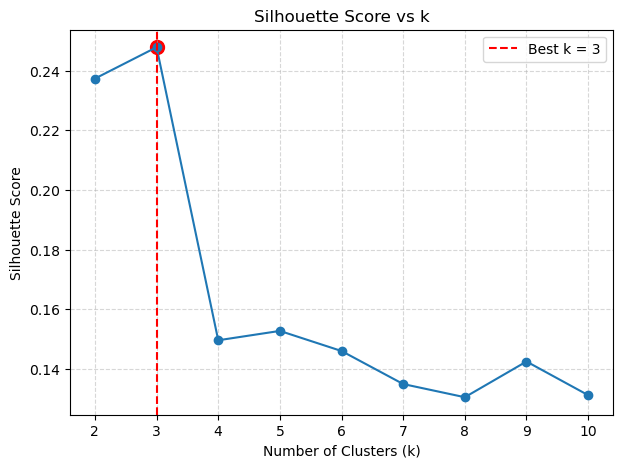

In [25]:
# Determine Optimal Clusters (Silhouette Method) 

sil_scores = []

k_range = range(2, 11)

for k in k_range: 
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_preprocessed)
    sil_scores.append(silhouette_score(X_preprocessed, labels))

# Find best k
best_k = k_range[int(np.argmax(sil_scores))]
best_s = max(sil_scores)

print("Optimal number of clusters (Silhouette):", best_k)
print("Best Silhouette Score:", round(best_s, 3))

# Plot silhouette scores
plt.figure(figsize=(7,5))
plt.plot(list(k_range), sil_scores, marker='o')
plt.axvline(best_k, linestyle='--', color='red', label=f"Best k = {best_k}")
plt.scatter(best_k, best_s, s=100, color='red')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

`FROM THESE TWO GRAPHS I USE K = 6 FROM ELBOW METHOD`

# Fit Final K-Means

In [26]:
# Fit KMeans on preprocessed data (without PCA)

kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)

df_prep['Cluster'] = kmeans.fit_predict(X_preprocessed)



In [27]:
df_prep

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Spendings,Age,Total_Children,Total_Purchases,Total_Campaigns_Accepted,Cluster
0,Graduation,Single,58138.0,58,7,0,1617,68,0,25,1,1
1,Graduation,Single,46344.0,38,5,0,27,71,2,6,0,5
2,Graduation,Together,71613.0,26,4,0,776,60,0,21,0,2
3,Graduation,Together,26646.0,26,6,0,53,41,1,8,0,3
4,PhD,Married,58293.0,94,5,0,422,44,1,19,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,5,0,1341,58,1,18,0,1
2236,PhD,Together,64014.0,56,7,0,444,79,3,22,1,5
2237,Graduation,Divorced,56981.0,91,6,0,1241,44,0,19,1,2
2238,Master,Together,69245.0,8,3,0,843,69,1,23,0,1


# CLUSTER INTERPRETATION

- Cluster Centroids in Original Scale

In [28]:
# Extract numeric centroids in original scale
centroids_scaled = kmeans.cluster_centers_[:, :len(numeric_features)]
centroids_original = preprocessor.named_transformers_['num']['scaler'].inverse_transform(centroids_scaled)

centroids = pd.DataFrame(centroids_original, columns=numeric_features)


In [29]:
len(numeric_features)

9

In [30]:
centroids

,Income,Recency,NumWebVisitsMonth,Complain,Total_Spendings,Age,Total_Children,Total_Purchases,Total_Campaigns_Accepted
0,79549.893491,44.266272,3.538462,1.734723e-18,1579.224852,54.562130,0.224852,20.917160,2.893491
1,59852.466546,46.942134,5.649186,7.112366e-17,846.884268,60.135624,1.097649,22.318264,0.321881
2,77889.785146,52.848806,2.214854,3.295975e-17,1250.809019,57.702918,0.119363,19.607427,0.334218
3,30292.260450,48.680064,6.872990,8.326673e-17,109.463023,47.876206,0.818328,7.935691,0.196141
4,45242.285714,53.047619,5.809524,1.000000e+00,376.428571,59.904762,1.190476,13.238095,0.285714
5,42365.485232,50.327004,5.976793,5.377643e-17,131.892405,61.660338,1.845992,9.478903,0.154008


# Cluster Labeling based on Income & Total Spending

In [31]:
# Map clusters back to original DataFrame
# df['Cluster'] = df_prep['Cluster']

In [32]:
income_median = df_prep['Income'].median()
spending_median = df_prep['Total_Spendings'].median()

cluster_labels = {}
for i, row in centroids.iterrows():
    inc = row['Income']
    spend = row['Total_Spendings']
    
    if inc > income_median and spend > spending_median:
        label = "High-Value Customers"
    elif inc > income_median and spend <= spending_median:
        label = "Careful Spenders"
    elif inc <= income_median and spend > spending_median:
        label = "Big Spenders on Budget"
    else:
        label = "Low-Value Customers"
        
    cluster_labels[i] = label

# 4️⃣ Map to DataFrame
df_prep['Cluster_Label'] = df_prep['Cluster'].map(cluster_labels)

# Sample Customers per Cluster

In [33]:
for c in sorted(df_prep['Cluster'].unique()):
    print(f"\nCluster {c} ({cluster_labels[c]}) sample IDs:",
          df_prep[df_prep['Cluster']==c].head(5).index.tolist())


Cluster 0 (High-Value Customers) sample IDs: [15, 53, 55, 60, 67]

Cluster 1 (High-Value Customers) sample IDs: [0, 4, 5, 6, 17]

Cluster 2 (High-Value Customers) sample IDs: [2, 12, 29, 45, 51]

Cluster 3 (Low-Value Customers) sample IDs: [3, 7, 8, 11, 14]

Cluster 4 (Low-Value Customers) sample IDs: [78, 147, 192, 271, 355]

Cluster 5 (Low-Value Customers) sample IDs: [1, 9, 13, 16, 26]


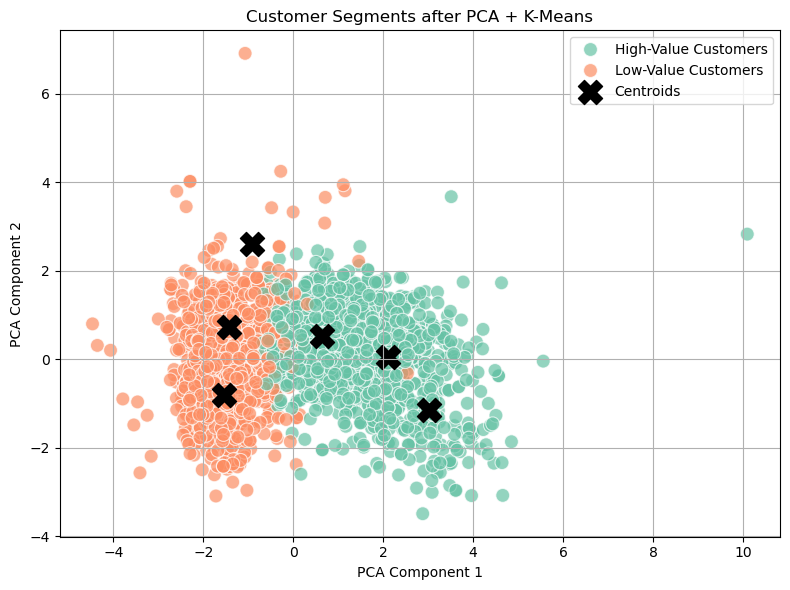

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=df_prep['Cluster_Label'],
    palette='Set2',
    s=100, alpha=0.7
)

# Transform centroids to PCA space for plotting
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:,0], centroids_pca[:,1],
    s=300, color='black', marker='X', label='Centroids'
)

plt.title("Customer Segments after PCA + K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Visualize Clusters (PCA Components)

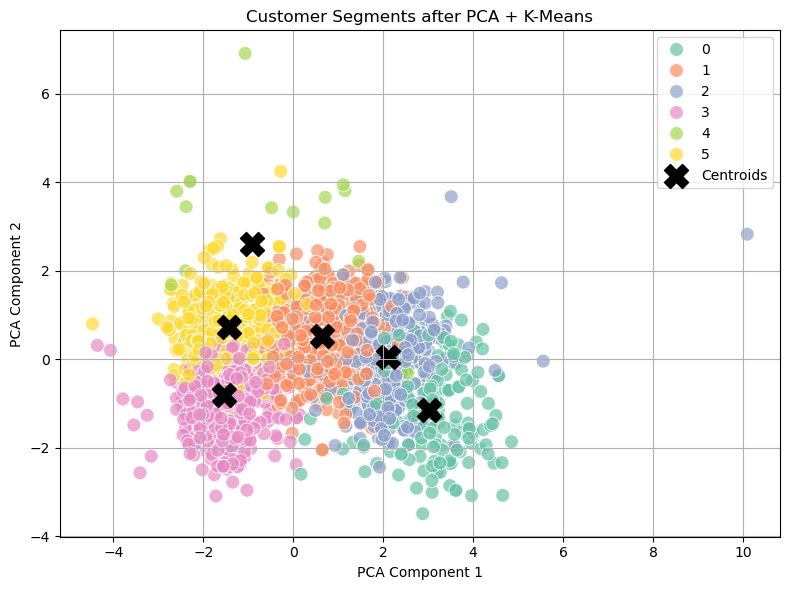

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=df_prep['Cluster'],  # use raw cluster numbers for 6 colors
    palette='Set2',
    s=100, alpha=0.7
)

# Transform centroids to PCA space for plotting
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:,0], centroids_pca[:,1],
    s=300, color='black', marker='X', label='Centroids'
)

plt.title("Customer Segments after PCA + K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Extract the models

In [36]:
import pickle

# Save the preprocessor
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# Save the KMeans model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save cluster labels mapping
with open('cluster_labels.pkl', 'wb') as f:
    pickle.dump(cluster_labels, f)


In [37]:
df_prep

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Spendings,Age,Total_Children,Total_Purchases,Total_Campaigns_Accepted,Cluster,Cluster_Label
0,Graduation,Single,58138.0,58,7,0,1617,68,0,25,1,1,High-Value Customers
1,Graduation,Single,46344.0,38,5,0,27,71,2,6,0,5,Low-Value Customers
2,Graduation,Together,71613.0,26,4,0,776,60,0,21,0,2,High-Value Customers
3,Graduation,Together,26646.0,26,6,0,53,41,1,8,0,3,Low-Value Customers
4,PhD,Married,58293.0,94,5,0,422,44,1,19,0,1,High-Value Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,5,0,1341,58,1,18,0,1,High-Value Customers
2236,PhD,Together,64014.0,56,7,0,444,79,3,22,1,5,Low-Value Customers
2237,Graduation,Divorced,56981.0,91,6,0,1241,44,0,19,1,2,High-Value Customers
2238,Master,Together,69245.0,8,3,0,843,69,1,23,0,1,High-Value Customers
